# Pension Data Analysis  - Zach Buckley

# Load in Libraries and data

In [1]:
# Import necessary libraries
import numpy as np  #Import the numpy library for numerical computing
import pandas as pd #Import the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt #Import matplotlib.pyplot for data visualization
import seaborn as sns #Import seaborn for plots and data visualization

In [2]:
#Read in CSV sheets
returns =   pd.read_excel('public_plans_data_new.xlsx',sheet_name = "PensionInvestmentReturn")
membership = pd.read_excel('public_plans_data_new.xlsx',sheet_name = "PensionMembership")
basics = pd.read_excel('public_plans_data_new.xlsx',sheet_name = "PensionPlanBasics")

# Explore and Filter Datsets

In [3]:
# Data info
returns.info()
membership.info()
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PlanName                      6497 non-null   object 
 1   fy                            6496 non-null   float64
 2   ppd_id                        6497 non-null   int64  
 3   TierID                        2327 non-null   float64
 4   AvgReturn_10yr                2976 non-null   float64
 5   AvgReturn_3yr                 4568 non-null   float64
 6   AvgReturn_5yr                 4112 non-null   float64
 7   EEGroupID                     6497 non-null   int64  
 8   InvestmentReturn_1yr          5642 non-null   float64
 9   InvestmentReturn_1yr_est      6478 non-null   float64
 10  InvestmentReturn_2yr          106 non-null    float64
 11  InvestmentReturn_3yr          4896 non-null   float64
 12  InvestmentReturn_4yr          62 non-null     float64
 13  Inv

In [4]:
print(returns.shape)
print(membership.shape)
print(basics.shape)

(6497, 29)
(6497, 33)
(229, 19)


## Filter Data by Year

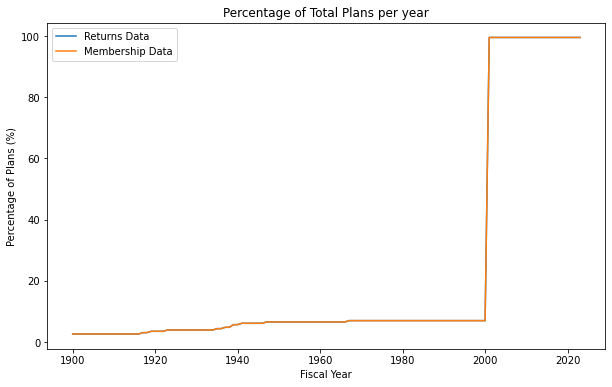

In [5]:
# Count the number of unique plans in each year 
plan_perc_returns = returns.groupby('fy')['PlanName'].nunique()/returns['PlanName'].nunique()*100
plan_perc_membership = membership.groupby('fy')['PlanName'].nunique()/membership['PlanName'].nunique()*100

data_coverage = pd.DataFrame({
    'Returns Data': plan_perc_returns,
    'Membership Data': plan_perc_membership
})

# Plot the data coverage over the years
data_coverage.plot(figsize=(10, 6))
plt.title('Percentage of Total Plans per year')
plt.xlabel('Fiscal Year')
plt.ylabel('Percentage of Plans (%)')
plt.show()

In [6]:
#Filter data by FY after 2000
returns_filtered = returns[returns['fy']>= 2001]
membership_filtered = membership[returns['fy']>= 2001]

In [7]:
print(returns_filtered.shape)
print(membership_filtered.shape)
print(basics.shape)

(5244, 29)
(5244, 33)
(229, 19)


## Assess Missingness and Select Variables of Interest

### Returns Data:

In [8]:
# Percentage missings for each column
perc_missing = returns_filtered.isnull().sum()/ len(returns_filtered) *100

# Count zeros for each column
perc_zero = (returns_filtered == 0).sum()/ len(returns_filtered) *100

missings_and_zeros = pd.DataFrame({
    'Missing Values': perc_missing.round(2),
    'Zero Values': perc_zero.round(2),
    'Total': (perc_missing + perc_zero).round(2)
})

print(missings_and_zeros)

                              Missing Values  Zero Values   Total
PlanName                                0.00         0.00    0.00
fy                                      0.00         0.00    0.00
ppd_id                                  0.00         0.00    0.00
TierID                                 55.63        44.37  100.00
AvgReturn_10yr                         43.25         0.00   43.25
AvgReturn_3yr                          12.89         0.10   12.99
AvgReturn_5yr                          21.59         0.02   21.61
EEGroupID                               0.00       100.00  100.00
InvestmentReturn_1yr                    4.00         0.19    4.20
InvestmentReturn_1yr_est                0.34        92.52   92.87
InvestmentReturn_2yr                   97.98         0.02   98.00
InvestmentReturn_3yr                    8.22         0.06    8.28
InvestmentReturn_4yr                   98.82         0.00   98.82
InvestmentReturn_5yr                   10.98         0.02   11.00
Investment

In [9]:
#Select just variables of interest
vars_of_interest = [
    'PlanName', 'fy','ppd_id', 'InvestmentReturn_1yr', 'InvestmentReturn_5yr', 
    'AvgReturn_5yr', 'InvestmentReturn_10yr', 'GeoReturn_est','InvestmentConsultantName'
]

returns_final = returns_filtered[vars_of_interest]


### Membership Data

In [10]:
# Percentage missings for each column in membership table
perc_missing = membership_filtered.isnull().sum()/ len(returns_filtered) *100

# Count zeros for each column
perc_zero = (membership_filtered == 0).sum()/ len(membership_filtered) *100

missings_and_zeros = pd.DataFrame({
    'Missing Values': perc_missing.round(2),
    'Zero Values': perc_zero.round(2),
    'Total': (perc_missing + perc_zero).round(2)
})

print(missings_and_zeros)

                                  Missing Values  Zero Values   Total
PlanName                                    0.00         0.00    0.00
fy                                          0.00         0.00    0.00
ppd_id                                      0.00         0.00    0.00
TierID                                     55.63        44.37  100.00
EEGroupID                                   0.00       100.00  100.00
TotMembership                               4.88         0.46    5.34
actives_tot                                 3.43         0.34    3.78
ActiveSalaries                              9.78         0.00    9.78
ActiveAge_avg                              35.56         0.00   35.56
ActiveTenure_avg                           36.78         0.00   36.78
ActiveSalary_avg                            4.23         0.23    4.46
ActiveSalary_avg_est                        0.34        80.09   80.43
beneficiaries_tot                           2.63         1.24    3.87
benefits_tot        

In [11]:
#Select just variables of interest in membership table
vars_of_interest = [
    'PlanName', 'fy', 'TotMembership', 'actives_tot' ,'ActiveAge_avg','ActiveTenure_avg','ActiveSalary_avg',
    'beneficiaries_tot','BeneficiaryBenefit_avg'
]

membership_final = membership_filtered[vars_of_interest]


### Basics Data

In [12]:
# Percentage missings for each column in membership table
perc_missing = basics.isnull().sum()/ len(basics) *100

# Count zeros for each column
perc_zero = (basics == 0).sum()/ len(basics) *100

missings_and_zeros = pd.DataFrame({
    'Missing Values': perc_missing.round(2),
    'Zero Values': perc_zero.round(2),
    'Total': (perc_missing + perc_zero).round(2)
})

print(missings_and_zeros)

                        Missing Values  Zero Values  Total
PlanName                          0.00         0.00   0.00
FiscalYearType                    0.44        33.62  34.06
PlanFullName                      0.44         0.00   0.44
SocSecCovered_verbatim            0.44         0.00   0.44
EmployeeTypeCovered               0.44         0.00   0.44
BenefitsWebsite                   9.17         0.00   9.17
ppd_id                            0.00         0.00   0.00
PlanInceptionYear                 3.93         0.00   3.93
PlanClosed                        0.44        92.58  93.01
PlanYearClosed                   93.45         0.00  93.45
AdministeringGovt                 0.44        52.84  53.28
StateAbbrev                       0.44         0.00   0.44
StateName                         0.44         0.00   0.44
GovtName                          0.44         0.00   0.44
PlanType                          0.00         0.00   0.00
CostSharing                      41.48         6.99  48.

In [13]:
#Select just variables of interest in membership table
vars_of_interest = [
   'ppd_id', 'StateName','PlanType','PlanInceptionYear','PlanClosed'
]

basics_final = basics[vars_of_interest]


## Join Final Tables

In [14]:
# Join returns_final and membership_final'
returns_membership = pd.merge(returns_final, membership_final, on=['PlanName', 'fy'], how='inner')

returns_membership_basics = pd.merge(returns_membership, basics_final, on='ppd_id', how='left')

In [15]:
#Check shapes of datasets to confirm results
print(membership_final.shape)
print(returns_final.shape)
print(basics_final.shape)

print(returns_membership_basics.shape)

(5244, 9)
(5244, 9)
(229, 5)
(5244, 20)


## Total Missings per Year

In [16]:
# count missing values for each year
missing_values_per_year = returns_membership_basics.groupby('fy').apply(lambda x: x.isnull().sum().sum())

print(missing_values_per_year)

fy
2001.0    1003
2002.0     920
2003.0     877
2004.0     821
2005.0     531
2006.0     493
2007.0     450
2008.0     446
2009.0     420
2010.0     279
2011.0     259
2012.0     239
2013.0     262
2014.0     249
2015.0     268
2016.0     232
2017.0     234
2018.0     232
2019.0     243
2020.0     249
2021.0     247
2022.0     273
2023.0    1270
dtype: int64


## Pension Returns Histogram

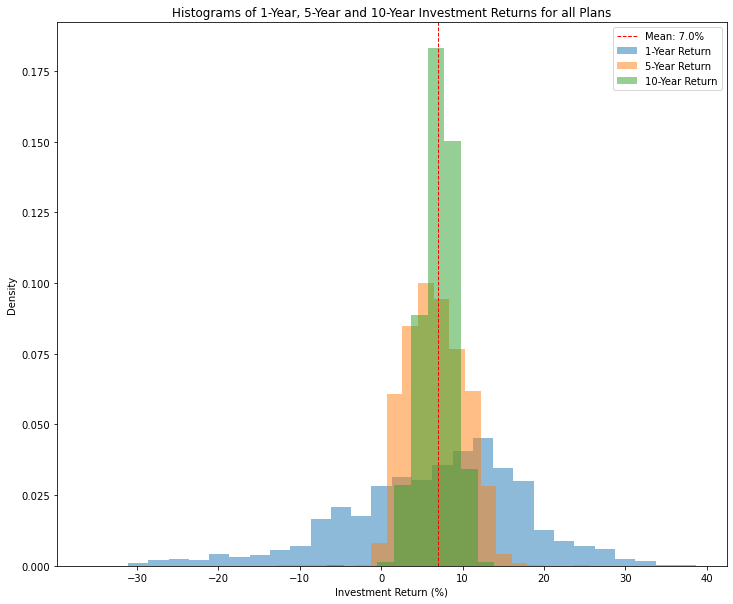

In [17]:
plt.figure(figsize=(12, 10))

# Histogram for 1-year investment returns
plt.hist(100*returns_membership_basics['InvestmentReturn_1yr'].dropna(), bins=30, alpha=0.5, density = True,label='1-Year Return')

# Histogram for 5-year investment returns
plt.hist(100*returns_membership_basics['InvestmentReturn_5yr'].dropna(), bins=20, alpha=0.5, density = True,label='5-Year Return')

# Histogram for 10-year investment returns
plt.hist(100*returns_membership_basics['InvestmentReturn_10yr'].dropna(), bins=10,alpha=0.5, density = True,label='10-Year Return')

# Calculate  the mean
mean_10yr_return = returns_membership_basics['InvestmentReturn_10yr'].mean()*100

plt.axvline(mean_10yr_return, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_10yr_return:.1f}%')

plt.title('Histograms of 1-Year, 5-Year and 10-Year Investment Returns for all Plans')
plt.xlabel('Investment Return (%)')
plt.ylabel('Density')
plt.legend()

plt.show()


## Investment Returns Through Time

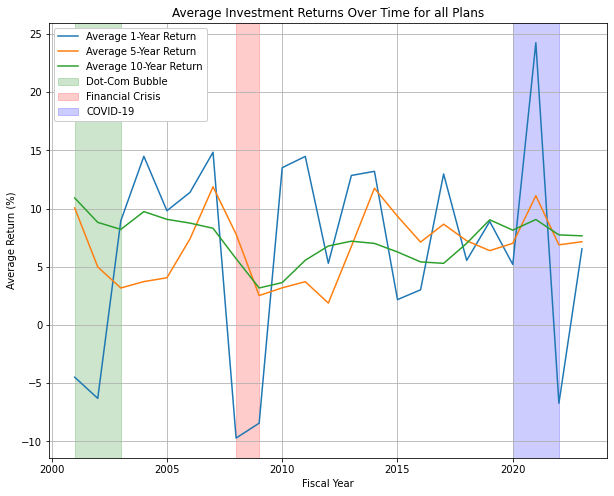

In [18]:
plt.figure(figsize=(10, 8))

# Extract means of data
grouped_data = returns_membership_basics.groupby('fy').mean()[['InvestmentReturn_1yr', 'InvestmentReturn_5yr', 'InvestmentReturn_10yr']]

# Plot each column
plt.plot(grouped_data.index, 100*grouped_data['InvestmentReturn_1yr'], label='Average 1-Year Return')
plt.plot(grouped_data.index, 100*grouped_data['InvestmentReturn_5yr'], label='Average 5-Year Return')
plt.plot(grouped_data.index, 100*grouped_data['InvestmentReturn_10yr'], label='Average 10-Year Return')
plt.axvspan(2001, 2003, color='green', alpha=0.2, label='Dot-Com Bubble')
plt.axvspan(2008, 2009, color='red', alpha=0.2, label='Financial Crisis')
plt.axvspan(2020, 2022, color='blue', alpha=0.2, label='COVID-19')

plt.title('Average Investment Returns Over Time for all Plans')
plt.xlabel('Fiscal Year')
plt.ylabel('Average Return (%)')

plt.legend(loc = 'upper left',framealpha = 1)
plt.grid(True)

plt.show()

In [19]:
# Get mean and SD of each period

financial_crisis_period = (returns_membership_basics['fy'] >= 2008) & (returns_membership_basics['fy'] <= 2009)
covid_period = (returns_membership_basics['fy'] >= 2020) & (returns_membership_basics['fy'] <= 2022)
dot_com_period = (returns_membership_basics['fy'] <= 2003)
normal_period = ~(dot_com_period | financial_crisis_period | covid_period)  

# Calculate mean, median, and std for the 1-year returns
financial_crisis_stats = 100*returns_membership_basics[financial_crisis_period]['InvestmentReturn_1yr'].agg(['mean', 'median', 'std']).round(3)
covid_stats = 100*returns_membership_basics[covid_period]['InvestmentReturn_1yr'].agg(['mean', 'median', 'std']).round(3)
dot_com_stats = 100*returns_membership_basics[dot_com_period]['InvestmentReturn_1yr'].agg(['mean', 'median', 'std']).round(3)
overall_stats = 100*returns_membership_basics['InvestmentReturn_1yr'].agg(['mean', 'median', 'std']).round(3)

summary_table = pd.DataFrame({
    'Dot-Com Bubble':dot_com_stats,
    'Financial Crisis (2008-2009)': financial_crisis_stats,
    'COVID Period (2020-2022)': covid_stats,
    'Overall Period': overall_stats
})

# Output the result
summary_table

,Dot-Com Bubble,Financial Crisis (2008-2009),COVID Period (2020-2022),Overall Period
mean,-0.5,-9.1,7.6,6.7
median,-3.7,-8.0,4.2,8.1
std,9.4,14.1,14.1,10.9


In [20]:
#Increase in sd
(covid_stats['std']-overall_stats['std'])/overall_stats['std']*100

29.357798165137588

## Members Over Time

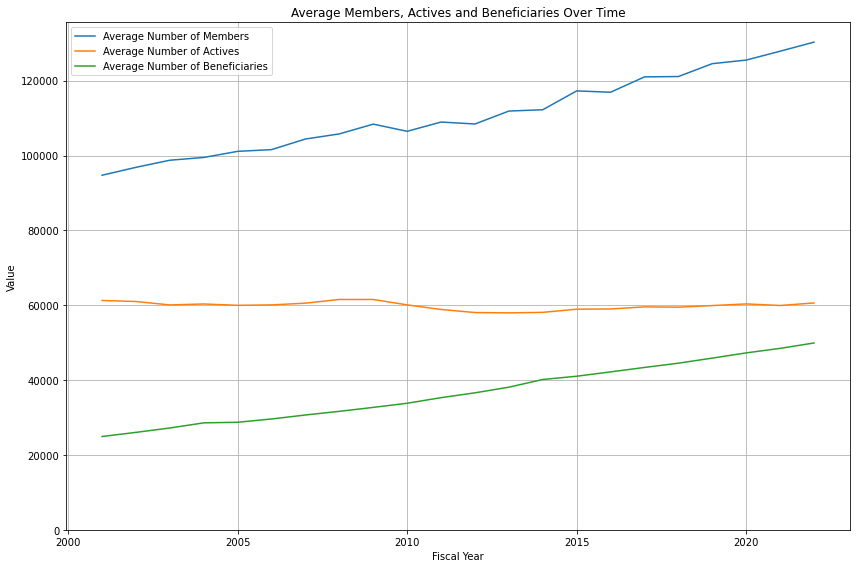

In [21]:
# Filter out 2023 due to significant missingness
returns_membership_filtered = returns_membership[returns_membership['fy'] != 2023]

# Define columns of interest
columns_of_interest = ['TotMembership', 'actives_tot','beneficiaries_tot']

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plot each category
for column in columns_of_interest:
    plt.plot(
        returns_membership_filtered.groupby('fy')[column].mean(), 
        label=column.replace('_', ' ').title()
    )

# Add title and labels
plt.title('Average Members, Actives and Beneficiaries Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Value')
plt.legend(['Average Number of Members', 'Average Number of Actives', 'Average Number of Beneficiaries'])
plt.ylim(bottom=0)

plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

## Age and Tenure Throgh Time

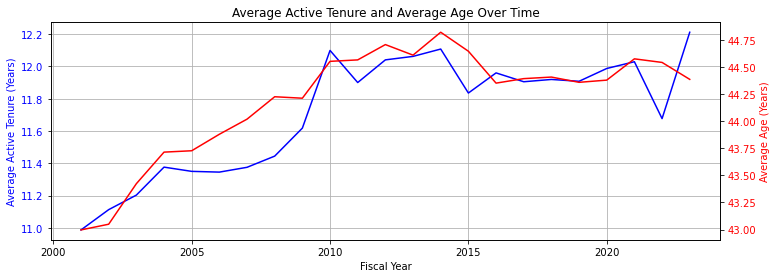

In [22]:
filter_tenure = returns_membership_basics[returns_membership_basics['ActiveTenure_avg'] < 1000]
filter_age = returns_membership_basics[returns_membership_basics['ActiveAge_avg'] < 120]

# Calculate mean
average_active_tenure = filter_tenure.groupby('fy')['ActiveTenure_avg'].mean()
average_age = filter_age.groupby('fy')['ActiveAge_avg'].mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(average_active_tenure.index, average_active_tenure, linestyle='-', color='b', label='Average Active Tenure')
ax1.set_xlabel('Fiscal Year')
ax1.set_ylabel('Average Active Tenure (Years)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(average_age.index, average_age, linestyle='-', color='r', label='Average Age')
ax2.set_ylabel('Average Age (Years)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Average Active Tenure and Average Age Over Time')
plt.show()


## Total Members per Consultant 

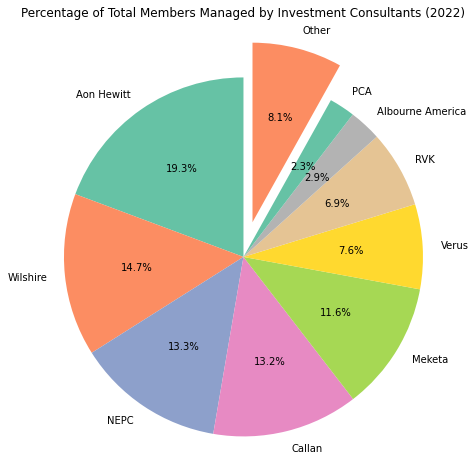

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for 2022
returns_2022 = returns_membership_basics[returns_membership_basics['fy'] == 2022]

# Sum the number of members each consultant manages
consultant_member_totals = returns_2022.groupby('InvestmentConsultantName')['TotMembership'].sum()
consultant_share = (consultant_member_totals / sum(consultant_member_totals)) * 100

# Group consultants with less than 2%
consultant_share_adjusted = consultant_share.sort_values(ascending=False)
other_share = consultant_share_adjusted[consultant_share_adjusted < 2].sum()
consultant_share_adjusted = consultant_share_adjusted[consultant_share_adjusted >= 2]
consultant_share_adjusted['Other'] = other_share

# Define colors
colors = sns.color_palette("Set2", len(consultant_share_adjusted))

explode = [0] * (len(consultant_share_adjusted) - 1) + [0.2]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    consultant_share_adjusted,
    labels=consultant_share_adjusted.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode
)

plt.title('Percentage of Total Members Managed by Investment Consultants (2022)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



## Consultant Performance

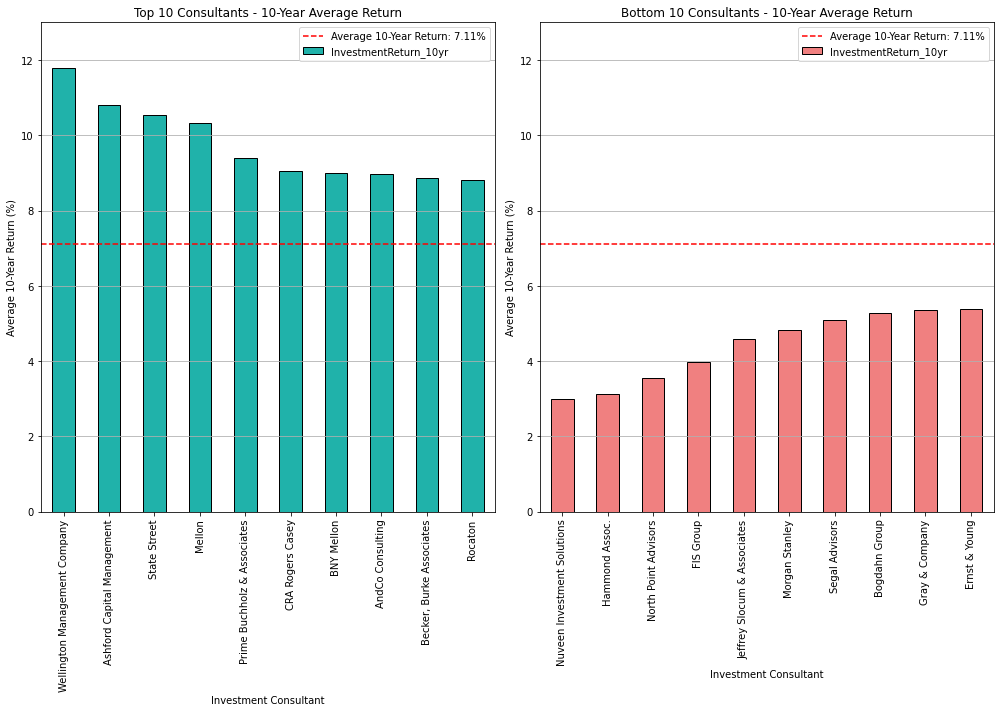

In [24]:
consultant_performance_10yr = 100*returns_membership.groupby('InvestmentConsultantName')['InvestmentReturn_10yr'].mean()

# Get top 10 and bottom 10 consultants by return
Top10_consultant_performance_10yr = consultant_performance_10yr.sort_values(ascending=False)[:10]
Bottom10_consultant_performance_10yr = consultant_performance_10yr.sort_values(ascending=True)[:10]

# Calculate the overall average
average_10yr_return = consultant_performance_10yr.mean()

# Plot bar charts
plt.figure(figsize=(14, 10))

# Top 10 Consultants
plt.subplot(1, 2, 1)
Top10_consultant_performance_10yr.plot(kind='bar', color='lightseagreen', edgecolor='black')
plt.axhline(y=average_10yr_return, color='red', linestyle='--', label=f'Average 10-Year Return: {average_10yr_return:.2f}%')
plt.title('Top 10 Consultants - 10-Year Average Return')
plt.xlabel('Investment Consultant')
plt.ylabel('Average 10-Year Return (%)')
plt.legend()
plt.grid(axis='y')
plt.ylim(0, 13) 

# Bottom 10 Consultants
plt.subplot(1, 2, 2)
Bottom10_consultant_performance_10yr.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.axhline(y=average_10yr_return, color='red', linestyle='--', label=f'Average 10-Year Return: {average_10yr_return:.2f}%')
plt.title('Bottom 10 Consultants - 10-Year Average Return')
plt.xlabel('Investment Consultant')
plt.ylabel('Average 10-Year Return (%)')
plt.legend()
plt.grid(axis='y')
plt.ylim(0, 13)  
plt.tight_layout()
plt.show()

In [25]:
#Get return values
print(Top10_consultant_performance_10yr)
print(Bottom10_consultant_performance_10yr)

InvestmentConsultantName
Wellington Management Company    11.800000
Ashford Capital Management       10.800000
State Street                     10.545000
Mellon                           10.320000
Prime Buchholz & Associates       9.400000
CRA Rogers Casey                  9.050000
BNY Mellon                        9.000000
AndCo Consulting                  8.978571
Becker, Burke Associates          8.861000
Rocaton                           8.813333
Name: InvestmentReturn_10yr, dtype: float64
InvestmentConsultantName
Nuveen Investment Solutions    2.984444
Hammond Assoc.                 3.118000
North Point Advisors           3.543000
FIS Group                      3.976000
Jeffrey Slocum & Associates    4.599400
Morgan Stanley                 4.817000
Segal Advisors                 5.100000
Bogdahn Group                  5.267000
Gray & Company                 5.347067
Ernst & Young                  5.392667
Name: InvestmentReturn_10yr, dtype: float64


## Return by State

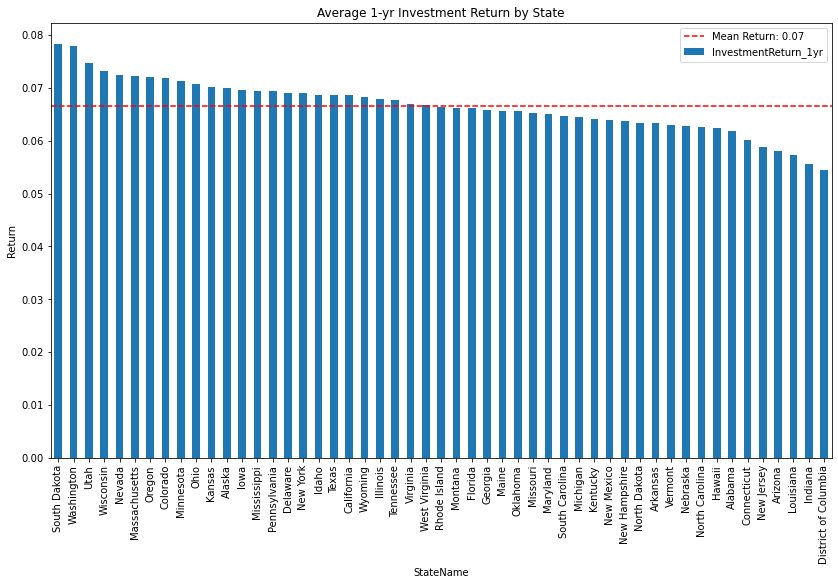

In [26]:
plt.figure(figsize=(14, 8))

# Calculate return by state
average_returns_by_state = returns_membership_basics.groupby('StateName')['InvestmentReturn_1yr'].mean().sort_values(ascending=False)

average_returns_by_state.plot(kind='bar')

# Calculate the mean return
mean_return = average_returns_by_state.mean()

# Add a horizontal line for the median return
plt.axhline(y=mean_return, color='r', linestyle='--', label=f'Mean Return: {mean_return:.2f}')

plt.title('Average 1-yr Investment Return by State')
plt.ylabel('Return')
plt.legend()
plt.show()